In [1]:
# basic packages
import pandas as pd
import os
import warnings
import pyarrow as pa
import pyarrow.parquet as pq
warnings.filterwarnings("ignore")

#Shared/Utility scripts
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from model_scripts import Simple_Eval, dataloader, dataprocessor2, xgb_model, SSWEET #had to pip install xgboost
HOME = os.getcwd()

modelname = 'XGBoost'
model_path = f"{HOME}/SWEMLv2.0/Model/{modelname}"
if not os.path.exists(model_path):
    os.makedirs(model_path, exist_ok=True)
print(f"{modelname} development script, {device}")

dataprocessor /uufs/chpc.utah.edu/common/home/civil-group1/Johnson/SWEMLv2.0/AWSaccessKeys.csv
Device: cuda
Device: cuda


XGBoost development script, cuda


In [2]:
'''
Note the number of scnenes for each watershed, some are aggregated if there are multiple scenes per watershed.

RQs and testing design:
1. What model performance can we expect from ML models for estimating seasonal SWE?
    - Need to hold all obs for the year(s) of interest
    - choose ~ 3 scene/yr, earlist (March/April), peak SWE, late season
    - Only a few basins will meet this test
    
2. How does including a ASO flights for the year of interest affect model skill?
    - If we fly near peak swe, does this improve basin SWE estimates throughout snow ablation?
    - find basins with multiple flights/year vs 1 flight/year - compare
    
3. How does the number of flights over a basin affect model skill?
    - Can we identify the optimal number of flights over a basin to get ample model performance?
    - Test near Peak SWE or just after, must not have any obs from this year for the basin
    
4. How does spatial resolution impact model skill?
    - Is there an optimal spatial resolution for modeling basin SWE heterogeneity?
    - Test near Peak SWE or just after, must not have any obs from this year for the basin
    
5. How many seasons of images per basin continue to improve model skill?
    

How should we characterize model performance?
    - should we include estimates for the entrire basin above a certain reach (e.g., including all zero SWE points as well)?
    - Only include points with snow? This will discount the model estimating no-snow areas correctly. 



'''


'\nNote the number of scnenes for each watershed, some are aggregated if there are multiple scenes per watershed.\n\nRQs and testing design:\n1. What model performance can we expect from ML models for estimating seasonal SWE?\n    - Need to hold all obs for the year(s) of interest\n    - choose ~ 3 scene/yr, earlist (March/April), peak SWE, late season\n    - Only a few basins will meet this test\n    \n2. How does including a ASO flights for the year of interest affect model skill?\n    - If we fly near peak swe, does this improve basin SWE estimates throughout snow ablation?\n    - find basins with multiple flights/year vs 1 flight/year - compare\n    \n3. How does the number of flights over a basin affect model skill?\n    - Can we identify the optimal number of flights over a basin to get ample model performance?\n    - Test near Peak SWE or just after, must not have any obs from this year for the basin\n    \n4. How does spatial resolution impact model skill?\n    - Is there an op

In [2]:
date_basin = {
#Sierras -  Tuolumne - 65 times
    '2013-04-03': 'Tuolumne',    
    '2013-04-29': 'Tuolumne',   
    '2013-05-03': 'Tuolumne',   
    '2013-05-25': 'Tuolumne',   
    '2013-06-01': 'Tuolumne',   
    '2013-06-08': 'Tuolumne',   

    '2014-03-23': 'Tuolumne',   
    '2014-04-07': 'Tuolumne',  
    '2014-04-20': 'Tuolumne',   
    '2014-04-28': 'Tuolumne',   
    '2014-05-02': 'Tuolumne',   
    '2014-05-11': 'Tuolumne',   
    '2014-05-17': 'Tuolumne',   
    '2014-05-27': 'Tuolumne',   
    '2014-05-31': 'Tuolumne',   
    '2014-06-05': 'Tuolumne',   

    '2015-02-17': 'Tuolumne',   
    '2015-03-05': 'Tuolumne',   
    '2015-03-25': 'Tuolumne',   
    '2015-04-03': 'Tuolumne',   
    '2015-04-09': 'Tuolumne',   
    '2015-04-15': 'Tuolumne',   
    '2015-04-27': 'Tuolumne',   
    '2015-05-28': 'Tuolumne',   
    '2015-06-08': 'Tuolumne',   

    '2016-03-26': 'Tuolumne',   
    '2016-04-01': 'Tuolumne',    
    '2016-04-07': 'Tuolumne',   
    '2016-04-16': 'Tuolumne',   
    '2016-04-26': 'Tuolumne',   
    '2016-05-09': 'Tuolumne',   
    '2016-05-27': 'Tuolumne',   
    '2016-07-08': 'Tuolumne',   

    '2017-01-29': 'Tuolumne',   
    '2017-07-17': 'Tuolumne',   
    '2017-07-27': 'Tuolumne',   
    '2017-08-16': 'Tuolumne',    

    '2018-04-23': 'Tuolumne',   
    '2018-05-28': 'Tuolumne',   

    '2019-03-24': 'Tuolumne',   
    '2019-04-17': 'Tuolumne',   
    '2019-05-03': 'Tuolumne',   
    '2019-06-13': 'Tuolumne',   
    '2019-07-05': 'Tuolumne',   

    '2020-04-13': 'Tuolumne',    
    '2020-05-07': 'Tuolumne',   
    '2020-05-21': 'Tuolumne',  
  
    '2021-02-24': 'Tuolumne',   
    '2021-04-29': 'Tuolumne', 

    '2022-02-28': 'Tuolumne',   
    '2022-02-04': 'Tuolumne',  
    '2022-04-05': 'Tuolumne',   
    '2022-04-29': 'Tuolumne',   
    '2022-05-18': 'Tuolumne',   

    '2023-04-27': 'Tuolumne',   
    '2023-01-24': 'Tuolumne',   
    '2023-06-01': 'Tuolumne',   
    '2023-06-26': 'Tuolumne',   
    '2023-03-02': 'Tuolumne',   
    '2023-03-16': 'Tuolumne',   

    '2024-04-02': 'Tuolumne',   
    '2024-02-27': 'Tuolumne',   
    '2024-01-29': 'Tuolumne',   
    '2024-05-01': 'Tuolumne',   
#Sierras - San Joaquin - 40 times
    '2017-07-18': 'San Joaquin',  
    '2017-07-19': 'San Joaquin',   
    '2017-08-15': 'San Joaquin',  

    '2018-04-23': 'San Joaquin',  
    '2018-06-02': 'San Joaquin',  
    '2018-04-23': 'San Joaquin',  
    '2018-06-01': 'San Joaquin',  
    '2018-03-04': 'San Joaquin',  
    '2018-04-22': 'San Joaquin',  
    '2018-06-01': 'San Joaquin',  

    '2019-03-15': 'San Joaquin',  
    '2019-06-05': 'San Joaquin',  
    '2019-03-17': 'San Joaquin',  
    '2019-05-02': 'San Joaquin',  
    '2019-06-09': 'San Joaquin',  
    '2019-07-04': 'San Joaquin',  
    '2019-07-14': 'San Joaquin',  
    '2019-03-25': 'San Joaquin',  
    '2019-05-01': 'San Joaquin',  
    '2019-06-14': 'San Joaquin',  
    '2019-07-04': 'San Joaquin',  
    '2019-07-13': 'San Joaquin',  

    '2020-04-14': 'San Joaquin',  
    '2020-05-04': 'San Joaquin',  
    '2020-06-08': 'San Joaquin',  
    '2020-05-23': 'San Joaquin',  

    '2021-02-26': 'San Joaquin',  
    '2021-03-31': 'San Joaquin',  
    '2021-05-03': 'San Joaquin',  

    '2022-03-16': 'San Joaquin',  
    '2022-04-17': 'San Joaquin',  
    '2022-04-30': 'San Joaquin',  
    '2022-02-06': 'San Joaquin',  

    '2023-04-14': 'San Joaquin',  
    '2023-03-17': 'San Joaquin',  

    '2024-04-29': 'San Joaquin',  
    '2024-02-22': 'San Joaquin',  
    '2024-01-27': 'San Joaquin',  
    '2024-03-26': 'San Joaquin',  
    '2024-05-21': 'San Joaquin',  
#Sierras -  Kings - 40 times
    '2017-07-18': 'Kings',  
    '2017-07-19': 'Kings',  
    '2017-08-15': 'Kings',  

    '2018-04-23': 'Kings',  
    '2018-06-02': 'Kings',  
    '2018-04-23': 'Kings',  
    '2018-06-01': 'Kings',  
    '2018-03-04': 'Kings',  
    '2018-04-22': 'Kings',  
    '2018-06-01': 'Kings',  

    '2019-03-15': 'Kings',  
    '2019-06-05': 'Kings',  
    '2019-03-17': 'Kings',  
    '2019-05-02': 'Kings',  
    '2019-06-09': 'Kings',  
    '2019-07-04': 'Kings',  
    '2019-07-14': 'Kings',  
    '2019-03-25': 'Kings',  
    '2019-05-01': 'Kings',  
    '2019-06-14': 'Kings',  
    '2019-07-04': 'Kings',  
    '2019-07-13': 'Kings',  

    '2020-04-14': 'Kings',  
    '2020-05-04': 'Kings',  
    '2020-06-08': 'Kings',  
    '2020-05-23': 'Kings',  

    '2021-02-26': 'Kings',  
    '2021-03-31': 'Kings',  
    '2021-05-03': 'Kings',  

    '2022-03-16': 'Kings',  
    '2022-04-17': 'Kings',  
    '2022-04-30': 'Kings',  
    '2022-02-06': 'Kings',  

    '2023-04-14': 'Kings',  
    '2023-03-17': 'Kings',  

    '2024-04-29': 'Kings',  
    '2024-02-22': 'Kings',  
    '2024-01-27': 'Kings',  
    '2024-03-26': 'Kings',  
    '2024-05-21': 'Kings',  
#Sierras - Merced - 33 times
    '2014-03-24': 'Merced', 
    '2014-04-06': 'Merced',  
    '2014-04-14': 'Merced',  
    '2014-04-23': 'Merced',  
    '2014-04-29': 'Merced',  
    '2014-05-03': 'Merced',  
    '2014-05-12': 'Merced',  

    '2015-04-28': 'Merced',  

    '2018-04-25': 'Merced',  

    '2019-03-29': 'Merced',  
    '2019-06-04': 'Merced',  
    '2019-07-03': 'Merced',  
    '2019-07-16': 'Merced', 

    '2020-04-13': 'Merced', 
    '2020-06-04': 'Merced',  
    '2020-05-21': 'Merced',  
    '2020-05-07': 'Merced',  

    '2021-04-29': 'Merced',  
    '2021-03-26': 'Merced',  
    '2022-03-01': 'Merced',  
    '2022-04-12': 'Merced', 
    '2022-04-28': 'Merced', 
    '2022-05-13': 'Merced', 

    '2023-01-31': 'Merced', 
    '2023-06-08': 'Merced', 
    '2023-03-03': 'Merced', 
    '2023-03-26': 'Merced',  
    '2023-05-15': 'Merced', 

    '2024-04-09': 'Merced',  
    '2024-02-12': 'Merced',  
    '2024-03-08': 'Merced',  
    '2024-05-02': 'Merced', 
    '2024-05-23': 'Merced', 
#Sierras - Kaweah 18 times
    '2019-03-17': 'Kaweah', 
    '2019-03-24': 'Kaweah', 
    '2019-04-21': 'Kaweah', 

    '2021-04-23': 'Kaweah', 
    '2021-05-04': 'Kaweah', 

    '2022-03-08': 'Kaweah', 
    '2022-04-29': 'Kaweah', 
    '2022-03-27': 'Kaweah', 
    '2022-05-17': 'Kaweah', 

    '2023-04-05': 'Kaweah', 
    '2023-04-23': 'Kaweah', 
    '2023-01-27': 'Kaweah', 
    '2023-06-02': 'Kaweah', 
    '2023-03-07': 'Kaweah', 

    '2024-04-03': 'Kaweah', 
    '2024-04-28': 'Kaweah', 
    '2024-02-11': 'Kaweah', 
    '2024-05-20': 'Kaweah', 
#Sierras - Lakes Basin, Mammoth? 16 times
    '2015-04-28': 'Lakes Basin',  

    '2016-05-09': 'Lakes Basin',  
    '2016-06-07': 'Lakes Basin',  
    '2016-06-14': 'Lakes Basin',  
    '2016-06-21': 'Lakes Basin',  
    '2016-06-26': 'Lakes Basin',  

    '2017-01-28': 'Lakes Basin',  
    '2017-07-18': 'Lakes Basin',  
    '2017-08-15': 'Lakes Basin',  

    '2018-04-22': 'Lakes Basin',  
    '2018-06-01': 'Lakes Basin',  

    '2019-03-09': 'Lakes Basin',
    '2019-05-01': 'Lakes Basin', 
    '2019-06-11': 'Lakes Basin',  
    '2019-07-03': 'Lakes Basin', 
    '2019-07-15': 'Lakes Basin', 
#Sierras - Yuba Seen 13 times
    '2022-04-24': 'Yuba',  
    '2022-03-25': 'Yuba', 
    '2022-05-15': 'Yuba',  

    '2023-04-05': 'Yuba',  
    '2023-04-26': 'Yuba', 
    '2023-01-28': 'Yuba',  
    '2023-06-25': 'Yuba', 
    '2023-05-31': 'Yuba', 

    '2024-04-01': 'Yuba', 
    '2024-04-29': 'Yuba',
    '2024-02-10': 'Yuba',  
    '2024-02-27': 'Yuba', 
    '2024-05-27': 'Yuba', 
#Feather - Seen 12 times
    '2022-04-29': 'Feather', 
    '2022-02-17': 'Feather', 
    '2022-03-10': 'Feather', 
    '2022-03-31': 'Feather', 

    '2023-04-09': 'Feather', 
    '2023-04-28': 'Feather',
    '2023-02-06': 'Feather', 
    '2023-06-18': 'Feather', 

    '2024-04-16': 'Feather',
    '2024-02-22': 'Feather', 
    '2024-03-15': 'Feather',
    '2024-05-13': 'Feather',
# Cherry Eleanor - Seen 11 times
    '2016-04-01': 'Cherry_Eleanor', 
    '2016-04-07': 'Cherry_Eleanor', 
    '2016-04-16': 'Cherry_Eleanor', 
    '2016-04-26': 'Cherry_Eleanor', 
    '2016-05-09': 'Cherry_Eleanor', 

    '2017-01-29': 'Cherry_Eleanor', 
    '2017-07-17': 'Cherry_Eleanor', 
    '2017-07-27': 'Cherry_Eleanor', 
    '2017-08-16': 'Cherry_Eleanor',

    '2018-04-23': 'Cherry_Eleanor', 
    '2018-05-28': 'Cherry_Eleanor',
#Sierras- Carson -  seen 11 times
    '2022-04-06': 'Carson', 
    '2022-03-11': 'Carson', 
    '2022-05-13': 'Carson', 

    '2023-06-07': 'Carson', 
    '2023-03-31': 'Carson', 
    '2023-05-10': 'Carson', 

    '2024-04-17': 'Carson', 
    '2024-02-22': 'Carson', 
    '2024-06-07': 'Carson', 
    '2024-03-21': 'Carson', 
    '2024-05-16': 'Carson',
#Sierras - Truckee - Seen 10 times
    '2022-04-08': 'Truckee', 
    '2022-03-10': 'Truckee', 
    '2022-05-14': 'Truckee', 

    '2023-04-09': 'Truckee', 
    '2023-06-08': 'Truckee', 
    '2023-05-11': 'Truckee', 

    '2024-04-01': 'Truckee', 
    '2024-04-18': 'Truckee', 
    '2024-02-27': 'Truckee',
    '2024-05-17': 'Truckee',
#Sierras - American - seen 7 times
    '2023-01-31': 'American', 
    '2023-04-13': 'American', 
    '2023-04-28': 'American', 
    '2023-06-02': 'American',

    '2024-02-11': 'American',
    '2024-04-10': 'American', 
    '2024-04-30': 'American', 
#Sierras - Kern - seen 7 times
    '2023-02-04': 'Kern', 
    '2023-03-26': 'Kern',
    '2023-04-29': 'Kern', 
    '2023-06-03': 'Kern', 

    '2024-02-10': 'Kern',
    '2024-04-11': 'Kern',
    '2024-05-08': 'Kern',
 #Sierras - Rush creek - seen 5 times
    '2015-03-26': 'Rush',
    '2015-05-03': 'Rush', 
    '2015-05-27': 'Rush', 
    '2015-06-09': 'Rush',

    '2017-07-17': 'Rush',
#Sierra - McCloud- seen 3 times
    '2023-04-24': 'McCloud', 
    '2023-02-09': 'McCloud', 
    '2023-05-15': 'McCloud',
 #Sierras - Owens/mono - seen 3 times
    '2023-07-02': 'Owens-Mono', 
    '2023-06-15': 'Owens-Mono', 
    '2023-05-27': 'Owens-Mono',
 #Sierras - Lee Vining - seen 1 time. Dont know how useful a July one here is... - probably the same as Rush creek
    '2017-07-17': 'Lee_Vining',


#Rocky Mountains - Conejos seen 10 times
    '2015-04-06': 'Conejos', 
    '2015-06-02': 'Conejos', 

    '2016-04-03': 'Conejos', 

    '2021-04-20': 'Conejos',
    '2021-05-16': 'Conejos',

    '2022-04-15': 'Conejos', 
    '2022-05-10': 'Conejos', 

    '2023-05-05': 'Conejos',

    '2024-04-02': 'Conejos',
#Rocky Mountains - Blue - seen 9 times
    '2019-04-19': 'Blue', 
    '2019-06-24': 'Blue', 

    '2021-04-18': 'Blue', 
    '2021-05-24': 'Blue', 

    '2022-04-19': 'Blue', 
    '2022-05-26': 'Blue', 

    '2023-04-16': 'Blue', 

    '2024-04-25': 'Blue', 
    '2024-06-05': 'Blue',
#Rocky Mountains - Pit - seen 9 times
    '2023-01-30': 'Pit', 
    '2023-02-08': 'Pit', 
    '2023-02-12': 'Pit', 
    '2023-04-13': 'Pit',
    '2023-04-15': 'Pit', 
    '2023-04-25': 'Pit', 
    '2023-05-10': 'Pit', 
    '2023-05-11': 'Pit', 
    '2023-05-13': 'Pit',
#Rockies - Dolores - Seen 8 times
    '2021-04-20': 'Dolores', 
    '2021-05-14': 'Dolores', 

    '2022-04-15': 'Dolores', 
    '2022-05-10': 'Dolores', 

    '2023-04-06': 'Dolores', 
    '2023-05-25': 'Dolores', 

    '2024-04-04': 'Dolores', 
    '2024-04-30': 'Dolores',
#Rockies - East River - 7 times
    '2016-04-04': 'East', 

    '2018-03-30': 'East', 
    '2018-03-31': 'East', 
    '2018-05-24': 'East', 

    '2019-04-07': 'East', 
    '2019-06-10': 'East',

    '2024-04-03': 'East',
 #Rockies - Taylor - Seen 7 times
    '2018-03-30': 'Taylor', 

    '2019-04-08': 'Taylor',
    '2019-06-09': 'Taylor', 

    '2023-04-01': 'Taylor', 
    '2023-05-23': 'Taylor', 

    '2024-04-04': 'Taylor', 
    '2024-05-20': 'Taylor',
#Rockies - Roaring Fork - seen 6 times
    '2019-04-07': 'RoaringFork', 
    '2019-06-10': 'RoaringFork', 

    '2023-04-11': 'RoaringFork', 
    '2023-05-28': 'RoaringFork', 

    '2024-04-09': 'RoaringFork', 
    '2024-05-22': 'RoaringFork',
 #Rockies - Windy Gap? -seen 6 times
    '2022-04-18': 'WindyGap', 

    '2023-04-16': 'WindyGap', 
    '2023-05-27': 'WindyGap', 

    '2024-04-14': 'WindyGap',
    '2024-03-21': 'WindyGap',
    '2024-05-30': 'WindyGap',
 #Rockies - South Platte - seen 4 times
    '2023-04-16': 'SouthPlatte', 
    '2023-05-26': 'SouthPlatte',

    '2024-04-24': 'SouthPlatte', 
    '2024-06-05': 'SouthPlatte',
 #Rockies - Gunnison - seen 4 times
    '2022-05-25': 'Gunnison', 
    '2022-04-21': 'Gunnison', 
    '2022-04-21': 'Gunnison', 
    '2022-05-25': 'Gunnison',
#Rockies - Rio Grande - seen 3 times
    '2015-04-07': 'RioGrande', 
    '2015-06-02': 'RioGrande', 

    '2016-04-03': 'RioGrande',
#Rockies - St Vrain - seen 2 times
    '2023-05-21': 'StVrain',

    '2024-04-21': 'StVrain',
#Rocky Mountains - Poudre - Seen 2 times
    '2023-05-22': 'Poudre', 

    '2024-04-15': 'Poudre',
#Rockies - Yampa - Seen 2 times
    '2024-04-11': 'Yampa', 
    '2024-05-27': 'Yampa',
#Rockies - Clear Creek - Seen 2 times
    '2023-05-09': 'Clear',

    '2024-05-02': 'Clear',
#Rockies - Boulder - seen 2 times
    '2023-05-09': 'Boulder', 
    
    '2024-05-02': 'Boulder',
#Rockies - Big Thompson - See 2 times
    '2023-05-09': 'BigThompson', 

    '2024-05-02': 'BigThompson', 
#Rockies - Animas - Seen 2 times
    '2021-04-19': 'Animas', 
    '2021-05-15': 'Animas',
#Rockies -Winds - Seen 1 time
    '2022-06-11': 'Winds',
#Rockies - Uncompaghre - seen 1 time
    '2014-03-20': 'Uncompaghre',
#Rockies - Uinta mountains - seen 1 time
    '2024-03-19': 'Uintas',
 #Rockies - Green River - might be the same images as the Winds... same date - seen 1 time
    '2022-06-11':'Green',

#Cascades - Olympic Penninsula - seen two times
    '2016-02-08': 'Olympic', 
    '2016-03-29': 'Olympic',
#Cascades - Sprague - seen 1 time
     '2024-03-14': 'Sprague',
     
}


Training model to make predictions for Merced on 2021-04-29 using: 750M_Resolution, DataUsed = False, and SampleMethods = False
Concatenating 6 for the model dataframe development.


  0%|          | 0/6 [00:00<?, ?it/s]

There are 15882 datapoints for model training/testing in the 2013 modeling domain.
Concatenating 18 for the model dataframe development.


  0%|          | 0/18 [00:00<?, ?it/s]

There are 90761 datapoints for model training/testing in the 2014 modeling domain.
Concatenating 20 for the model dataframe development.


  0%|          | 0/20 [00:00<?, ?it/s]

There are 104522 datapoints for model training/testing in the 2015 modeling domain.
Concatenating 16 for the model dataframe development.


  0%|          | 0/16 [00:00<?, ?it/s]

There are 52263 datapoints for model training/testing in the 2016 modeling domain.
Concatenating 8 for the model dataframe development.


  0%|          | 0/8 [00:00<?, ?it/s]

There are 18927 datapoints for model training/testing in the 2017 modeling domain.
Concatenating 11 for the model dataframe development.


  0%|          | 0/11 [00:00<?, ?it/s]

There are 37674 datapoints for model training/testing in the 2018 modeling domain.
Concatenating 35 for the model dataframe development.


  0%|          | 0/35 [00:00<?, ?it/s]

There are 120294 datapoints for model training/testing in the 2019 modeling domain.
Concatenating 10 for the model dataframe development.


  0%|          | 0/10 [00:00<?, ?it/s]

There are 67901 datapoints for model training/testing in the 2020 modeling domain.
Concatenating 17 for the model dataframe development.


  0%|          | 0/17 [00:00<?, ?it/s]

There are 89325 datapoints for model training/testing in the 2021 modeling domain.
Concatenating 36 for the model dataframe development.


  0%|          | 0/36 [00:00<?, ?it/s]

There are 246665 datapoints for model training/testing in the 2022 modeling domain.
Concatenating 60 for the model dataframe development.


  0%|          | 0/60 [00:00<?, ?it/s]

There are 431119 datapoints for model training/testing in the 2023 modeling domain.
Concatenating 24 for the model dataframe development.


  0%|          | 0/24 [00:00<?, ?it/s]

There are 147141 datapoints for model training/testing in the 2024 modeling domain.
There are 1422474 datapoints for model training/testing in the overall modeling domain.
Loading previous performance DataFrames
No performance DataFrames found, making them...
The provided data contains 1415906 data points, of which 78498 locations/timesteps show no SWE and VIIRS fsca > 20%
212896 locations/timesteps show SWE and VIIRS fsca < 20%
0 locations/timesteps show SWE greater than a realistic value (300 cm) in the 2013 domain
0 locations/timesteps show SWE greater than a realistic value (300 cm) in the 2014 domain
0 locations/timesteps show SWE greater than a realistic value (300 cm) in the 2015 domain
0 locations/timesteps show SWE greater than a realistic value (300 cm) in the 2016 domain
0 locations/timesteps show SWE greater than a realistic value (300 cm) in the 2017 domain
0 locations/timesteps show SWE greater than a realistic value (300 cm) in the 2018 domain
0 locations/timesteps show 

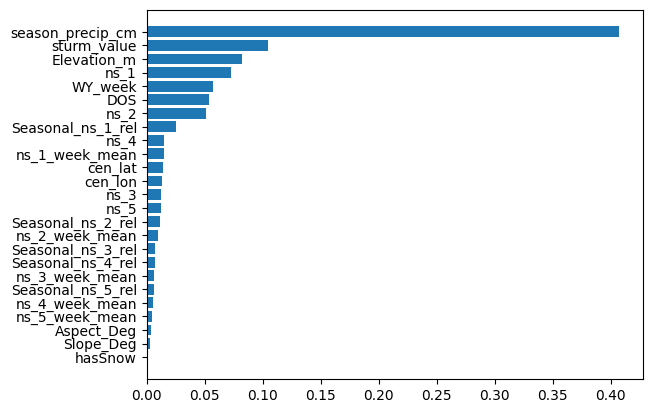

Saving Model
Run is Done!Run Time: 1988.8691956996918 seconds 
Model Predictions complete
100


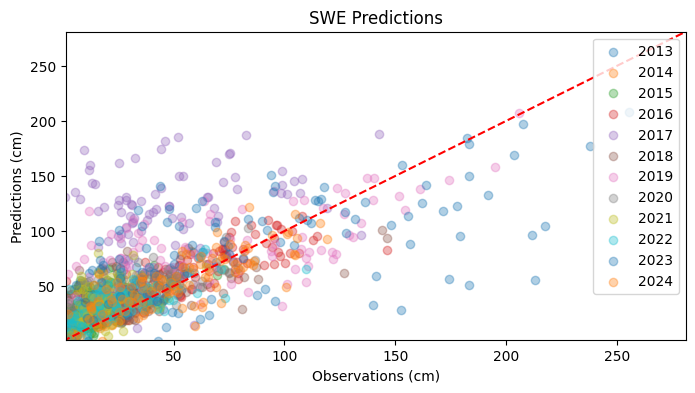

,region,XGBoost_swe_cm_kge,XGBoost_swe_cm_rmse,XGBoost_swe_cm_mape,XGBoost_swe_cm_pbias
0,Overall,0.52,33.0,143.16,-33.90
0,2013,0.34,19.0,112.28,-56.42
0,2014,0.14,15.0,169.30,-73.86
0,2015,-0.08,22.0,234.14,-87.28
0,2016,0.62,20.0,86.27,-9.66
0,2017,-0.67,77.0,383.80,-148.52
0,2018,0.50,21.0,71.61,-10.20
0,2019,0.49,39.0,141.14,-19.11
0,2020,0.45,20.0,141.82,-44.76
0,2021,-0.19,22.0,138.01,-88.55


Model Predictions complete


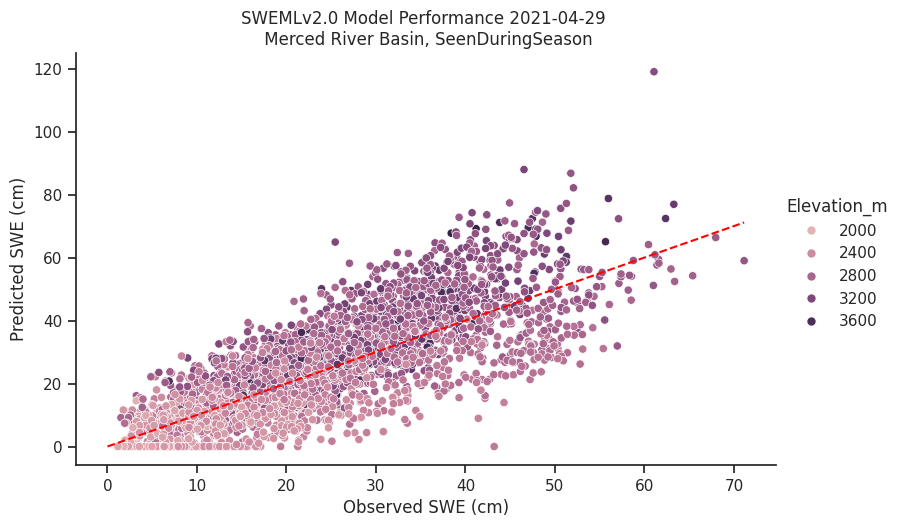

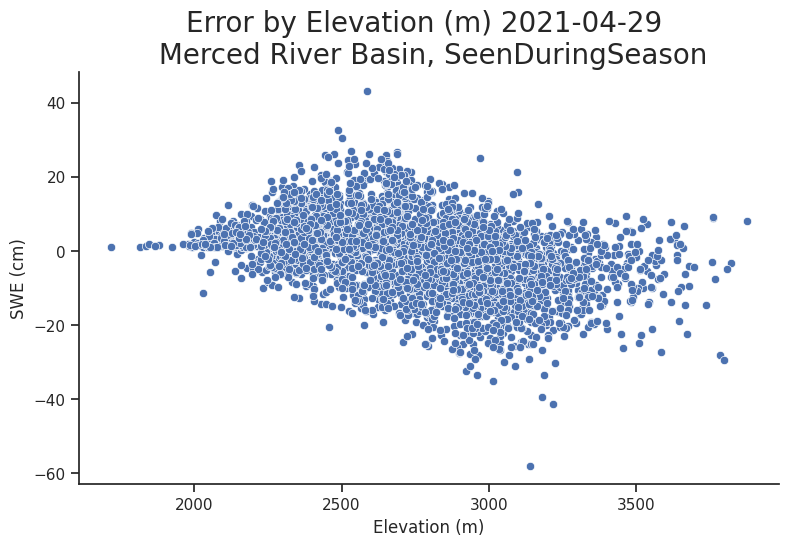

Error = observations - predictions
Training model to make predictions for Tuolumne on 2024-05-01 using: 750M_Resolution, DataUsed = False, and SampleMethods = False
Concatenating 6 for the model dataframe development.


  0%|          | 0/6 [00:00<?, ?it/s]

There are 15882 datapoints for model training/testing in the 2013 modeling domain.
Concatenating 18 for the model dataframe development.


  0%|          | 0/18 [00:00<?, ?it/s]

There are 90761 datapoints for model training/testing in the 2014 modeling domain.
Concatenating 20 for the model dataframe development.


  0%|          | 0/20 [00:00<?, ?it/s]

There are 104522 datapoints for model training/testing in the 2015 modeling domain.
Concatenating 16 for the model dataframe development.


  0%|          | 0/16 [00:00<?, ?it/s]

There are 52263 datapoints for model training/testing in the 2016 modeling domain.
Concatenating 8 for the model dataframe development.


  0%|          | 0/8 [00:00<?, ?it/s]

There are 18927 datapoints for model training/testing in the 2017 modeling domain.
Concatenating 11 for the model dataframe development.


  0%|          | 0/11 [00:00<?, ?it/s]

There are 37674 datapoints for model training/testing in the 2018 modeling domain.
Concatenating 35 for the model dataframe development.


  0%|          | 0/35 [00:00<?, ?it/s]

There are 120294 datapoints for model training/testing in the 2019 modeling domain.
Concatenating 10 for the model dataframe development.


  0%|          | 0/10 [00:00<?, ?it/s]

There are 67901 datapoints for model training/testing in the 2020 modeling domain.
Concatenating 17 for the model dataframe development.


  0%|          | 0/17 [00:00<?, ?it/s]

There are 89325 datapoints for model training/testing in the 2021 modeling domain.
Concatenating 36 for the model dataframe development.


  0%|          | 0/36 [00:00<?, ?it/s]

There are 246665 datapoints for model training/testing in the 2022 modeling domain.
Concatenating 60 for the model dataframe development.


  0%|          | 0/60 [00:00<?, ?it/s]

There are 431119 datapoints for model training/testing in the 2023 modeling domain.
Concatenating 24 for the model dataframe development.


  0%|          | 0/24 [00:00<?, ?it/s]

There are 147141 datapoints for model training/testing in the 2024 modeling domain.
There are 1422474 datapoints for model training/testing in the overall modeling domain.
Loading previous performance DataFrames
The provided data contains 1415999 data points, of which 78498 locations/timesteps show no SWE and VIIRS fsca > 20%
213125 locations/timesteps show SWE and VIIRS fsca < 20%
0 locations/timesteps show SWE greater than a realistic value (300 cm) in the 2013 domain
0 locations/timesteps show SWE greater than a realistic value (300 cm) in the 2014 domain
0 locations/timesteps show SWE greater than a realistic value (300 cm) in the 2015 domain
0 locations/timesteps show SWE greater than a realistic value (300 cm) in the 2016 domain
0 locations/timesteps show SWE greater than a realistic value (300 cm) in the 2017 domain
0 locations/timesteps show SWE greater than a realistic value (300 cm) in the 2018 domain
0 locations/timesteps show SWE greater than a realistic value (300 cm) in t

In [ ]:
'''
Testing for this model is on a single sceen for a year. 
For all tested basins, there is  another scene from the respective year
The goal here is to see if the number of flights per year improves prediction - only using the last observations date per season, and testing no later than end of May if possible
2 scenes per basin (different years)
The model is trained all the rest of the data
'''
sim  =  'SeenDuringSeason' 
dates = [ 
#2018-05-28', #, 'Tuolumne', 
#2020-05-21', #, 'Tuolumne',  
'2021-04-29', #, 'Tuolumne',
#2022-05-18', #, 'Tuolumne', 
'2024-05-01', #, 'Tuolumne',  
'2018-06-02', #, 'San Joaquin',
#2021-05-03', #, 'Kings', 
'2022-04-30', #, 'Kings',  
'2023-04-14', #, 'Kings',
#2024-05-21', #, 'Kings',
'2014-05-12', #, 'Merced', 
#2020-06-04', #, 'Merced', 
'2022-05-13', #, 'Merced', 
#2023-06-08', #, 'Merced', 
#2024-05-23', #, 'Merced',
'2019-04-21', #, 'Kaweah', 
'2021-05-04', #, 'Kaweah', 
#2022-05-17', #, 'Kaweah', 
#2023-06-02', #, 'Kaweah', 
#2024-05-20', #, 'Kaweah',   
'2018-06-01', #, 'Lakes Basin',  
'2022-05-15', #, 'Yuba',  
'2024-05-27', #, 'Yuba', 
'2022-04-29', #, 'Feather', 
'2024-05-13', #, 'Feather',
'2016-05-09', #, 'Cherry_Eleanor', 
'2022-05-13', #, 'Carson', 
'2022-05-14', #, 'Truckee', 
'2024-05-17', #, 'Truckee',
'2024-04-30', #, 'American', 
'2024-05-08', #, 'Kern',
'2023-05-15', #, 'McCloud',
#2015-06-02', #, 'Conejos', 
'2021-05-16', #, 'Conejos',
'2022-05-10', #, 'Conejos', 
#2019-06-24', #, 'Blue', 
'2021-05-24', #, 'Blue', 
'2022-05-26', #, 'Blue', 
#2024-06-05', #, 'Blue',
'2023-05-13', #, 'Pit',
'2021-05-14', #, 'Dolores', 
'2022-05-10', #, 'Dolores', 
#2023-05-25', #, 'Dolores', 
'2024-04-30', #, 'Dolores',
'2018-05-24', #, 'East', 
#2019-06-10', #, 'East',
#2019-06-09', #, 'Taylor', 
'2023-05-23', #, 'Taylor', 
'2024-05-20', #, 'Taylor',
'2023-05-28', #, 'RoaringFork', 
'2024-05-22', #, 'RoaringFork',
'2023-05-27', #, 'WindyGap', 
'2024-05-30', #, 'WindyGap', 
'2023-05-26', #, 'SouthPlatte',
#2024-06-05', #, 'SouthPlatte',
'2022-05-25', #, 'Gunnison',
#2015-06-02', #, 'RioGrande', 
'2024-05-27', #, 'Yampa',
'2021-04-19', #, 'Animas', 
'2021-05-15', #, 'Animas',
'2016-03-29', #, 'Olympic',    
]


DataUsed = [False] #use all data for training (True) and test with HOO, or have training/testing and HOO (False) - False leading to better model
SampleMethods =  [False] #Randomly sample all data before splitting for train/test (TRue), split train/test first, then randomize training (False)  - False leading to better model
Res = ['750M_Resolution'] #'300M_Resolution', '500M_Resolution', '750M_Resolution', '1000M_Resolution'
#train each model and predict
for output_res in Res:
    for date in dates:
        for dataused in DataUsed:
            for standard in SampleMethods:

                print(f"Training model to make predictions for {date_basin[date]} on {date} using: {output_res}, DataUsed = {dataused}, and SampleMethods = {standard}")

                
                #load data
                WY_list = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
                DataFrame = 'Sturm_Seasonality_PrecipVIIRSGeoObsDFs'
                fSCA_thresh = '20_fSCA_Thresh'
                remove0swe = True #set to False to use all data, set to True to remove values under a certain threshold
                removeswe_thresh = 1 #value in cm to remove ASO obs/rows from. 

                alldata = dataloader.get_ML_Data(WY_list, output_res, DataFrame, fSCA_thresh)
                
                #load performance dataframes
                try:
                    print('Loading previous performance DataFrames')
                    PDF = pd.read_parquet(f"{HOME}/SWEMLv2.0/Predictions/{DataFrame}/PDF_{sim}.parquet")
                    VDF = pd.read_parquet(f"{HOME}/SWEMLv2.0/Predictions/{DataFrame}/VDF_{sim}.parquet")
                    SWEDF = pd.read_parquet(f"{HOME}/SWEMLv2.0/Predictions/{DataFrame}/SWEDF_{sim}.parquet")

                except:    
                    print('No performance DataFrames found, making them...')
                    PDF = pd.DataFrame()
                    VDF = pd.DataFrame()
                    SWEDF = pd.DataFrame()

                #small adjustments to correct some data
                #aspect
                alldata['Aspect_Deg'] = alldata['Aspect_Deg']-270
                df = alldata[alldata['Aspect_Deg']>= 0]
                df['Aspect_Deg'] = abs(df['Aspect_Deg']-90)+270
                alldata.update(df)
                alldata['Aspect_Deg'] = abs(alldata['Aspect_Deg'])

                #Precip - looks like its in inches
                alldata['season_precip_cm'] = alldata['season_precip_cm']*2.54

                '''for Vegetation_Sturm_Seasonality_PrecipVIIRSGeoObsDFs, ASO obs
                put SW 2018-04-22, 2018-03-04, San Joaquin, in bad data folder seems too big for peaks
                in Southern Rockies 2019-04-07, East River, way too high of values, put in bad data folder'''
                
                
                TestArea = alldata[alldata['Date'] == date]
                TestArea.reset_index(inplace=True, drop=True)

                #remove Test area data from training/testing dataset
                df = pd.concat([alldata, TestArea]).drop_duplicates(keep=False)

                #clean the data
                df = dataprocessor2.data_clean(df, WY_list)
                df.head()

                #temporary for seasonality relationship
                df.fillna(1, inplace = True)

                #convert dates to datetime format
                df.Date = pd.to_datetime(df.Date)

                input_columns = [
                            'cen_lat',	
                            'cen_lon',	
                            'Elevation_m',	
                            'Slope_Deg',	
                            'Aspect_Deg',	
                            'ns_1',	
                            'ns_2',	
                            'ns_3',	
                            'ns_4',	
                            'ns_5',	
                           # 'ns_6',	
                            #'VIIRS_SCA', 
                            'hasSnow',
                            'season_precip_cm',
                         #   'region_class',
                            'DOS', 
                            'WY_week',
                            'ns_1_week_mean', 
                            'ns_2_week_mean', 
                            'ns_3_week_mean', 
                            'ns_4_week_mean',
                            'ns_5_week_mean', 
                           # 'ns_6_week_mean', 
                            'Seasonal_ns_1_rel',
                            'Seasonal_ns_2_rel',
                            'Seasonal_ns_3_rel', 
                            'Seasonal_ns_4_rel',
                            'Seasonal_ns_5_rel', 
                          #  'Seasonal_ns_6_rel',
                            'sturm_value',
                        # 'vegetation_value'
                ]



                years = False
                splitratio = 0.1
                test_years = [2019]
                target = 'swe_cm'
                remove0swe = True #set to False to use all data, set to True to remove values under a certain threshold
                removeswe_thresh = 1 #value in cm to remove ASO obs/rows from. 
                #remove the large amounts of zero values

                df = dataloader.remove0swe(df, remove0swe, removeswe_thresh)

                  #fit a scaler,save, and scale the training data
                x_train, y_train, x_test, y_test = dataprocessor2.xgb_processor(
                                                                    WY_list,
                                                                    df, 
                                                                    years, 
                                                                    splitratio,
                                                                    test_years, 
                                                                    target, 
                                                                    input_columns, 
                                                                    model_path, 
                                                                    scalertype = 'MinMax',
                                                                    standard = standard,
                                                                    alldata = dataused #setting this to true will use all available data to train the model, uses HOO to test, There will not be any plots
                                                                    )

                #Train model
                tries = 1 #what is tries?
                hyperparameters = {
                    'max_depth': [8],     #[8], #range (7, 9,1), #7-good
                    'n_estimators': [3500],#  [20,500,3500],#[3500], #range(3000, 3600, 500),  #5500 - at max tested estimator, test higher and lower values on HOO data
                    'eta': [0.1]
                }

                perc_data = 0.30 # percent of training data used to identify optimal hyperparameters

                Use_fSCA_Threshold = True

                bestparams = xgb_model.XGB_Train(model_path, 
                                    input_columns, 
                                    x_train, 
                                    y_train, 
                                    tries, 
                                    hyperparameters,
                                    perc_data)

                #Make a prediction for each location, save as compressed pkl file, and send predictions to AWS for use in CSES
                if dataused == False:
                    PredsDF = pd.DataFrame()
                    PredsDF = xgb_model.XGB_Predict(
                                        model_path, 
                                        modelname, 
                                        x_test,
                                        y_test,
                                        Use_fSCA_Threshold
                                        )
                    #Take a sample to determine model skill - Take 1000 from each modeling domain
                    n_samples = 100
                    SampleDF, PredsDF = Simple_Eval.SamplePreds(WY_list, PredsDF, df, n_samples)


                    savfig = False
                    figname = f"Model-Testing-Split-Performance-HOO_UnseenSeason-{date}"

                    #Evaluate model performance of the different models
                    prediction_columns = [f"{modelname}_swe_cm"]
                    Eval_DF = Simple_Eval.Simple_Eval(WY_list,
                                                    SampleDF,
                                                    prediction_columns, 
                                                    modelname, 
                                                    savfig, 
                                                    figname,
                                                    plots = False, 
                                                    keystats = False        
                                                    )

                #Prep prediction data
                y_test_Area = pd.DataFrame(TestArea['swe_cm'])
                dropcols = ['cell_id',	'Date', 'swe_cm', 'region']
                x_test_Area = TestArea.drop(columns=dropcols)
                x_test_Area = x_test_Area[input_columns]

                #make a prediction
                holdoutdate = xgb_model.XGB_Predict(
                                    model_path, 
                                    modelname, 
                                    x_test_Area,
                                    y_test_Area,
                                    Use_fSCA_Threshold
                                    )
                #Add geospatial information to prediction DF
                EvalDF = pd.concat([TestArea, holdoutdate], axis=1)
                #EvalDF.drop(['index'], axis=1, inplace=True)
                EvalDF = EvalDF.loc[:,~EvalDF.columns.duplicated()].copy()

                EvalDF.head(5)

                Ppath = f"{HOME}/SWEMLv2.0/Predictions/{DataFrame}/{output_res}/{fSCA_thresh}"
                if not os.path.exists(Ppath):
                    os.makedirs(Ppath, exist_ok=True)


                #save the model predictions
                table = pa.Table.from_pandas(EvalDF)
                # Parquet with Brotli compression
                pq.write_table(table, f"{Ppath}/20SWEthresh_All_Feats_HOO_UnseenSeason_{date}.parquet", compression='BROTLI')



                #Begin Evaluation
                savfig = True
                DataFrame = 'Sturm_Seasonality_PrecipVIIRSGeoObsDFs'
                fSCA_thresh = '20_fSCA_Thresh'
                # date =  '2013-04-29'
             #   region = date_region[date]
                watershed = date_basin[date]
                markersize = 45


                #Prediction path
                Ppath = f"{HOME}/SWEMLv2.0/Predictions/{DataFrame}/{output_res}/{fSCA_thresh}"

                #Load data
                #EvalDF = pd.read_parquet(f"{Ppath}/All_Feats_HoldOut_03-29-2019.parquet")
                EvalDF = pd.read_parquet(f"{Ppath}/20SWEthresh_All_Feats_HOO_UnseenSeason_{date}.parquet")

                #Change obs/pred column names if necessary
                EvalDF.rename(columns={'ASO_swe_cm':'y_test','XGBoost_swe_cm':'y_pred'}, inplace=True)

                #just get swe >1cm
                EvalDF = EvalDF[EvalDF['y_test']>1]

                #Parity Plot
                Performance = SSWEET.parityplot(EvalDF, savfig, watershed, date, sim)
                Performance

                #Error vs Elevation
                SSWEET.Model_Vs(EvalDF,'Elevation_m', 'Error', savfig, watershed, date, sim)

                #spatial
                cmap = 'seismic' # use seismic for error, viridis or blues for preds/obs
                var =  'error' #'error'
                var_short = 'Error'
                Title = f'SWEMLv2.0 Model {var_short} {date} \n {watershed} River Basin, Unseen Season'
                variant = 'World_Imagery'
                figname = f"./SWEMLv2.0/Evaluation/Figures/{watershed}_spatial_{var}_{date}_{output_res}_{sim}"


                SSWEET.SpatialAnalysis(EvalDF, markersize, cmap, var,Title, savfig, variant, figname)

                cols =['Volume_Difference', 'Predicted_Volume', 'Observed_Volume']
                scaler = 10000
                ylab = f'Frozen Water Volume (x{scaler}m3)'
                ncol = 3
                Title = f'Volumetric Frozen Water Content at Low, Mid, and High Elevation Bands \n {watershed} River Basin {date}, {sim}'
                figname = f"SWEMLv2.0/Evaluation/Figures/{watershed}_SWEVol_{date}_{output_res}_{sim}.png"

                Vdf = SSWEET.barplot(EvalDF, cols, scaler, ylab, ncol, Title, savfig, figname)
                Vdf['watershed'] = watershed
                Vdf['Date'] = date

                cols =['Mean_SWE_Prediction', 'Mean_SWE_Observation']
                scaler = 1
                ylab = f'Snow-Water-Equivalent (cm)'
                ncol = 3
                Title = f'Mean SWE at Low, Mid, and High Elevation Bands \n {watershed} River Basin, {date} ,  {sim}'
                figname = f"SWEMLv2.0/Evaluation/Figures/{watershed}_MeanSWE_{date}_{output_res}_{sim}.png"

                SWEdf = SSWEET.barplot(EvalDF, cols, scaler, ylab, ncol, Title, savfig, figname)
                SWEdf['watershed'] = watershed
                SWEdf['Date'] = date


                cols = ['RMSE', 'KGE', 'PBias']
                Performance = Performance[cols]
                Performance['watershed'] = watershed
                Performance['Date'] = date
                Performance['Resolution'] = output_res
                Performance['n_estimators'] = bestparams['n_estimators']
                Performance['max_depth'] = bestparams['max_depth']
                Performance['eta'] = bestparams['eta']
                Performance['alldata'] = dataused
                Performance['standard_training'] = standard

                PDF = pd.concat([PDF, Performance])
                VDF = pd.concat([VDF, Vdf])
                SWEDF = pd.concat([SWEDF, SWEdf])
                
                #save Performance Dataframes
                xgb_model.XGB_Perf_Save(PDF, f"{HOME}/SWEMLv2.0/Predictions/{DataFrame}/", f"PDF_{sim}")
                xgb_model.XGB_Perf_Save(VDF, f"{HOME}/SWEMLv2.0/Predictions/{DataFrame}/", f"VDF_{sim}")
                xgb_model.XGB_Perf_Save(SWEDF, f"{HOME}/SWEMLv2.0/Predictions/{DataFrame}/", f"SWEDF_{sim}")

In [4]:
PDF.sort_values(by =['KGE', 'RMSE'], ascending =[False, False])

,RMSE,KGE,PBias,watershed,Date,Resolution,n_estimators,max_depth,eta,alldata,standard_training
0,17.11,0.90,4.77,Tuolumne,2019-03-24,750M_Resolution,3500,8,0.1,False,False
0,9.82,0.78,3.70,Tuolumne,2013-05-03,750M_Resolution,3500,8,0.1,False,False
0,9.99,0.76,4.90,Taylor,2019-04-08,750M_Resolution,3500,8,0.1,False,False
0,9.65,0.75,-6.30,East,2018-03-31,750M_Resolution,3500,8,0.1,False,False
0,11.11,0.70,25.01,Tuolumne,2013-04-29,750M_Resolution,3500,8,0.1,False,False
0,5.08,0.70,8.27,Kings,2015-04-12,750M_Resolution,3500,8,0.1,False,False
0,31.49,0.69,15.43,San Joaquin,2019-03-25,750M_Resolution,3500,8,0.1,False,False
0,12.90,0.68,-2.83,Blue,2019-04-19,750M_Resolution,3500,8,0.1,False,False
0,7.10,0.65,12.17,Taylor,2018-03-30,750M_Resolution,3500,8,0.1,False,False
0,34.09,0.64,-26.47,Merced,2019-03-29,750M_Resolution,3500,8,0.1,False,False


In [10]:
PDFalldata =  pd.read_parquet(f"{HOME}/SWEMLv2.0/Predictions/Sturm_Seasonality_PrecipVIIRSGeoObsDFs/PDF_AllData.parquet")
PDFalldata.sort_values(by =['KGE', 'RMSE'], ascending =[False, False])


,RMSE,KGE,PBias,watershed,Date,Resolution,n_estimators,max_depth,eta,alldata,standard_training
0,17.11,0.90,4.77,Tuolumne,2019-03-24,750M_Resolution,3500,8,0.1,False,False
0,9.82,0.78,3.70,Tuolumne,2013-05-03,750M_Resolution,3500,8,0.1,False,False
0,9.99,0.76,4.90,Taylor,2019-04-08,750M_Resolution,3500,8,0.1,False,False
0,9.65,0.75,-6.30,East,2018-03-31,750M_Resolution,3500,8,0.1,False,False
0,11.11,0.70,25.01,Tuolumne,2013-04-29,750M_Resolution,3500,8,0.1,False,False
0,5.08,0.70,8.27,Kings,2015-04-12,750M_Resolution,3500,8,0.1,False,False
0,31.49,0.69,15.43,San Joaquin,2019-03-25,750M_Resolution,3500,8,0.1,False,False
0,12.90,0.68,-2.83,Blue,2019-04-19,750M_Resolution,3500,8,0.1,False,False
0,7.10,0.65,12.17,Taylor,2018-03-30,750M_Resolution,3500,8,0.1,False,False
0,34.09,0.64,-26.47,Merced,2019-03-29,750M_Resolution,3500,8,0.1,False,False


In [12]:
PDF =  pd.read_parquet(f"{HOME}/SWEMLv2.0/Predictions/Sturm_Seasonality_PrecipVIIRSGeoObsDFs/PDF.parquet")
PDF = PDF[PDF['Resolution'].str.contains('750M_Resolution')]
PDF.sort_values(by =['KGE', 'RMSE'], ascending =[False, False])

,RMSE,KGE,PBias,watershed,Date,Resolution,n_estimators,max_depth,eta,alldata,standard_training
0,8.700000,0.88,7.05,Tuolumne,2013-04-29,750M_Resolution,3500,8,0.1,False,False
0,8.660000,0.82,14.76,East,2016-04-04,750M_Resolution,3500,8,0.1,False,False
0,10.160000,0.76,16.61,Tuolumne,2013-05-03,750M_Resolution,3500,8,0.1,False,False
0,4.830000,0.74,23.01,Merced,2014-04-29,750M_Resolution,3500,8,0.1,False,False
0,4.610000,0.72,11.68,Kings,2015-04-12,750M_Resolution,3500,8,0.1,False,False
0,11.320000,0.71,-16.23,East,2018-03-31,750M_Resolution,3500,8,0.1,False,False
0,25.350000,0.69,8.12,Merced,2019-03-29,750M_Resolution,3500,8,0.1,False,False
0,15.940000,0.57,14.90,Taylor,2019-04-08,750M_Resolution,3500,8,0.1,False,False
0,48.070000,0.53,34.31,San Joaquin,2019-03-25,750M_Resolution,3500,8,0.1,False,False
0,43.430000,0.51,27.42,Tuolumne,2019-03-24,750M_Resolution,3500,8,0.1,False,False
